# BOOK RECOMMENDATION

In [1]:
##IMPORTING THE REQUIRED LIBRARIES

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
books = pd.read_csv('Books.csv')
users = pd.read_csv('Users.csv')
ratings = pd.read_csv('Ratings.csv')

C:\Users\keert\anaconda3\envs\book_Recommendation\lib\site-packages\IPython\core\interactiveshell.py:3553: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [4]:
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [5]:
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [6]:
books.shape, users.shape, ratings.shape

((271360, 8), (278858, 3), (1149780, 3))

# EXPLORATORY DATA ANALYSIS

# CHECKING THE MISSING VALUES

In [7]:
books.isnull().sum()

ISBN                   0
Book-Title             0
Book-Author            1
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64

In [8]:
books[books.isnull().any(axis=1)]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
128890,193169656X,Tyrant Moon,Elaine Corvidae,2002,NaN,http://images.amazon.com/images/P/193169656X.0...,http://images.amazon.com/images/P/193169656X.0...,http://images.amazon.com/images/P/193169656X.0...
129037,1931696993,Finders Keepers,Linnea Sinclair,2001,NaN,http://images.amazon.com/images/P/1931696993.0...,http://images.amazon.com/images/P/1931696993.0...,http://images.amazon.com/images/P/1931696993.0...
187689,9627982032,The Credit Suisse Guide to Managing Your Perso...,NaN,1995,Edinburgh Financial Publishing,http://images.amazon.com/images/P/9627982032.0...,http://images.amazon.com/images/P/9627982032.0...,http://images.amazon.com/images/P/9627982032.0...
209538,078946697X,"DK Readers: Creating the X-Men, How It All Beg...",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,NaN
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-M...",2003,Gallimard,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...,NaN
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Book...",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,NaN


In [9]:
# Dropping all the null values permanently

books.dropna(inplace=True)

In [10]:
books['Year-Of-Publication'].unique()

array([2002, 2001, 1991, 1999, 2000, 1993, 1996, 1988, 2004, 1998, 1994,
       2003, 1997, 1983, 1979, 1995, 1982, 1985, 1992, 1986, 1978, 1980,
       1952, 1987, 1990, 1981, 1989, 1984, 0, 1968, 1961, 1958, 1974,
       1976, 1971, 1977, 1975, 1965, 1941, 1970, 1962, 1973, 1972, 1960,
       1966, 1920, 1956, 1959, 1953, 1951, 1942, 1963, 1964, 1969, 1954,
       1950, 1967, 2005, 1957, 1940, 1937, 1955, 1946, 1936, 1930, 2011,
       1925, 1948, 1943, 1947, 1945, 1923, 2020, 1939, 1926, 1938, 2030,
       1911, 1904, 1949, 1932, 1928, 1929, 1927, 1931, 1914, 2050, 1934,
       1910, 1933, 1902, 1924, 1921, 1900, 2038, 2026, 1944, 1917, 1901,
       2010, 1908, 1906, 1935, 1806, 2021, '2000', '1995', '1999', '2004',
       '2003', '1990', '1994', '1986', '1989', '2002', '1981', '1993',
       '1983', '1982', '1976', '1991', '1977', '1998', '1992', '1996',
       '0', '1997', '2001', '1974', '1968', '1987', '1984', '1988',
       '1963', '1956', '1970', '1985', '1978', '1973', '1980'

In [11]:
books['Year-Of-Publication'] = books['Year-Of-Publication'].astype(int)

In [12]:
books.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 271354 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271354 non-null  object
 1   Book-Title           271354 non-null  object
 2   Book-Author          271354 non-null  object
 3   Year-Of-Publication  271354 non-null  int32 
 4   Publisher            271354 non-null  object
 5   Image-URL-S          271354 non-null  object
 6   Image-URL-M          271354 non-null  object
 7   Image-URL-L          271354 non-null  object
dtypes: int32(1), object(7)
memory usage: 17.6+ MB


In [13]:
print(sorted(list(books['Year-Of-Publication'].unique())))

[0, 1376, 1378, 1806, 1897, 1900, 1901, 1902, 1904, 1906, 1908, 1909, 1910, 1911, 1914, 1917, 1919, 1920, 1921, 1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2008, 2010, 2011, 2012, 2020, 2021, 2024, 2026, 2030, 2037, 2038, 2050]


In [14]:
## Replacing Invalid years with max year

books['Year-Of-Publication'].mode()

0    2002
dtype: int32

In [15]:
books.loc[books['Year-Of-Publication'] > 2022, 'Year-Of-Publication'] = 2002
books.loc[books['Year-Of-Publication'] == 0, 'Year-Of-Publication'] = 2002

In [16]:
ratings.isnull().sum()

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

In [17]:
users.isnull().sum()

User-ID          0
Location         0
Age         110762
dtype: int64

In [18]:
## Check for all values present in Age column

print(sorted(list(users['Age'].unique())))

[nan, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0, 100.0, 101.0, 102.0, 103.0, 104.0, 105.0, 106.0, 107.0, 108.0, 109.0, 110.0, 111.0, 113.0, 114.0, 115.0, 116.0, 118.0, 119.0, 123.0, 124.0, 127.0, 128.0, 132.0, 133.0, 136.0, 137.0, 138.0, 140.0, 141.0, 143.0, 146.0, 147.0, 148.0, 151.0, 152.0, 156.0, 157.0, 159.0, 162.0, 168.0, 172.0, 175.0, 183.0, 186.0, 189.0, 199.0, 200.0, 201.0, 204.0, 207.0, 208.0, 209.0, 210.0, 212.0, 219.0, 220.0, 223.0, 226.0

In [19]:
required = users[users['Age'] <= 80]
required = required[required['Age'] >= 10]

In [20]:
mean = round(required['Age'].mean())   
mean

35

In [21]:
users.loc[users['Age'] > 80, 'Age'] = mean    #outliers with age grater than 80 are substituted with mean 
users.loc[users['Age'] < 10, 'Age'] = mean    #outliers with age less than 10 years are substitued with mean
users['Age'] = users['Age'].fillna(mean)      #filling null values with mean
users['Age'] = users['Age'].astype(int)       #changing Datatype to int

In [22]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   User-ID   278858 non-null  int64 
 1   Location  278858 non-null  object
 2   Age       278858 non-null  int32 
dtypes: int32(1), int64(1), object(1)
memory usage: 5.3+ MB


In [23]:
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",35
1,2,"stockton, california, usa",18
2,3,"moscow, yukon territory, russia",35
3,4,"porto, v.n.gaia, portugal",17
4,5,"farnborough, hants, united kingdom",35


In [24]:
users['city'] = users['Location'].str.split(',').str[0]
users['state'] = users['Location'].str.split(',').str[1]
users['country'] = users['Location'].str.split(',').str[2]

In [25]:
users.drop(['Location'],axis=1,inplace=True)

In [26]:
users.head()

,User-ID,Age,city,state,country
0,1,35,nyc,new york,usa
1,2,18,stockton,california,usa
2,3,35,moscow,yukon territory,russia
3,4,17,porto,v.n.gaia,portugal
4,5,35,farnborough,hants,united kingdom


# Checking the Dulipcate values

In [27]:
books.duplicated().sum()

0

In [28]:
users.duplicated().sum()

0

In [29]:
ratings.duplicated().sum()

0

# Merging Dataframes

In [30]:
temp_df = books.merge(ratings, how='left', on='ISBN')
final_df = temp_df.merge(users, how='left', on='User-ID')
final_df.shape

(1032338, 14)

In [31]:
final_df.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,User-ID,Book-Rating,Age,city,state,country
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,2.0,0.0,18.0,stockton,california,usa
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,8.0,5.0,35.0,timmins,ontario,canada
2,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,11400.0,0.0,49.0,ottawa,ontario,canada
3,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,11676.0,8.0,35.0,n/a,n/a,n/a
4,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,41385.0,0.0,35.0,sudbury,ontario,canada


In [32]:
##Divide complete data on the basis of Implicit and Explicit ratings final_dfs


## Explicit Ratings
final_df1 = final_df[final_df['Book-Rating'] != 0]
final_df1 = final_df1.reset_index(drop = True)
final_df1.shape

(385047, 14)

In [33]:
## Implicit Ratings

final_df2 = final_df[final_df['Book-Rating'] == 0]
final_df2 = final_df2.reset_index(drop = True)
final_df2.shape

(647291, 14)

In [34]:
final_df1.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,User-ID,Book-Rating,Age,city,state,country
0,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,8.0,5.0,35.0,timmins,ontario,canada
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,11676.0,8.0,35.0,n/a,n/a,n/a
2,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,67544.0,8.0,30.0,toronto,ontario,canada
3,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,116866.0,9.0,35.0,ottawa,,
4,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,123629.0,9.0,35.0,kingston,ontario,canada


In [35]:
final_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 385047 entries, 0 to 385046
Data columns (total 14 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ISBN                 385047 non-null  object 
 1   Book-Title           385047 non-null  object 
 2   Book-Author          385047 non-null  object 
 3   Year-Of-Publication  385047 non-null  int32  
 4   Publisher            385047 non-null  object 
 5   Image-URL-S          385047 non-null  object 
 6   Image-URL-M          385047 non-null  object 
 7   Image-URL-L          385047 non-null  object 
 8   User-ID              383838 non-null  float64
 9   Book-Rating          383838 non-null  float64
 10  Age                  383838 non-null  float64
 11  city                 383838 non-null  object 
 12  state                383838 non-null  object 
 13  country              383838 non-null  object 
dtypes: float64(3), int32(1), object(10)
memory usage: 39.7+ MB


# Popularity Based Recommendation System


In [36]:
book_title_and_ratings_only = final_df1.groupby('Book-Title').count()['Book-Rating'].reset_index()
book_title_and_ratings_only.rename(columns={'Book-Rating' : 'num_rating'}, inplace=True)
book_title_and_ratings_only

,Book-Title,num_rating
0,A Light in the Storm: The Civil War Diary of ...,1
1,"Ask Lily (Young Women of Faith: Lily Series, ...",1
2,Dark Justice,1
3,Earth Prayers From around the World: 365 Pray...,7
4,Final Fantasy Anthology: Official Strategy Gu...,2
...,...,...
136674,Ã?Â?bernachten mit Stil. Die schÃ?Â¶nsten Coun...,1
136675,Ã?Â?rger mit Produkt X. Roman.,3
136676,Ã?Â?sterlich leben.,1
136677,Ã?Â?stlich der Berge.,1


In [37]:
book_title_and_avg_ratings_only = final_df1.groupby('Book-Title').mean()['Book-Rating'].reset_index()
book_title_and_avg_ratings_only.rename(columns={'Book-Rating' : 'avg_rating'}, inplace=True)
book_title_and_avg_ratings_only

,Book-Title,avg_rating
0,A Light in the Storm: The Civil War Diary of ...,9.000000
1,"Ask Lily (Young Women of Faith: Lily Series, ...",8.000000
2,Dark Justice,10.000000
3,Earth Prayers From around the World: 365 Pray...,7.142857
4,Final Fantasy Anthology: Official Strategy Gu...,10.000000
...,...,...
136674,Ã?Â?bernachten mit Stil. Die schÃ?Â¶nsten Coun...,8.000000
136675,Ã?Â?rger mit Produkt X. Roman.,7.000000
136676,Ã?Â?sterlich leben.,7.000000
136677,Ã?Â?stlich der Berge.,8.000000


In [38]:
popular_books = book_title_and_ratings_only.merge(book_title_and_avg_ratings_only, on='Book-Title')
popular_books

,Book-Title,num_rating,avg_rating
0,A Light in the Storm: The Civil War Diary of ...,1,9.000000
1,"Ask Lily (Young Women of Faith: Lily Series, ...",1,8.000000
2,Dark Justice,1,10.000000
3,Earth Prayers From around the World: 365 Pray...,7,7.142857
4,Final Fantasy Anthology: Official Strategy Gu...,2,10.000000
...,...,...,...
136674,Ã?Â?bernachten mit Stil. Die schÃ?Â¶nsten Coun...,1,8.000000
136675,Ã?Â?rger mit Produkt X. Roman.,3,7.000000
136676,Ã?Â?sterlich leben.,1,7.000000
136677,Ã?Â?stlich der Berge.,1,8.000000


In [39]:
top_10_books = popular_books[popular_books['num_rating'] >= 250].sort_values('avg_rating', ascending=False).head(10)
top_10_books

,Book-Title,num_rating,avg_rating
45787,Harry Potter and the Prisoner of Azkaban (Book 3),277,9.043321
124693,To Kill a Mockingbird,267,8.977528
45797,Harry Potter and the Sorcerer's Stone (Harry P...,315,8.936508
45768,Harry Potter and the Chamber of Secrets (Book 2),326,8.840491
126587,"Tuesdays with Morrie: An Old Man, a Young Man,...",250,8.588000
117160,The Secret Life of Bees,406,8.477833
103572,The Da Vinci Code,494,8.439271
111149,The Lovely Bones: A Novel,707,8.185290
115915,The Red Tent (Bestselling Backlist),383,8.182768
132416,Where the Heart Is (Oprah's Book Club (Paperba...,295,8.142373


Text(0.5, 1.0, 'Popularity Based Recommendation System')

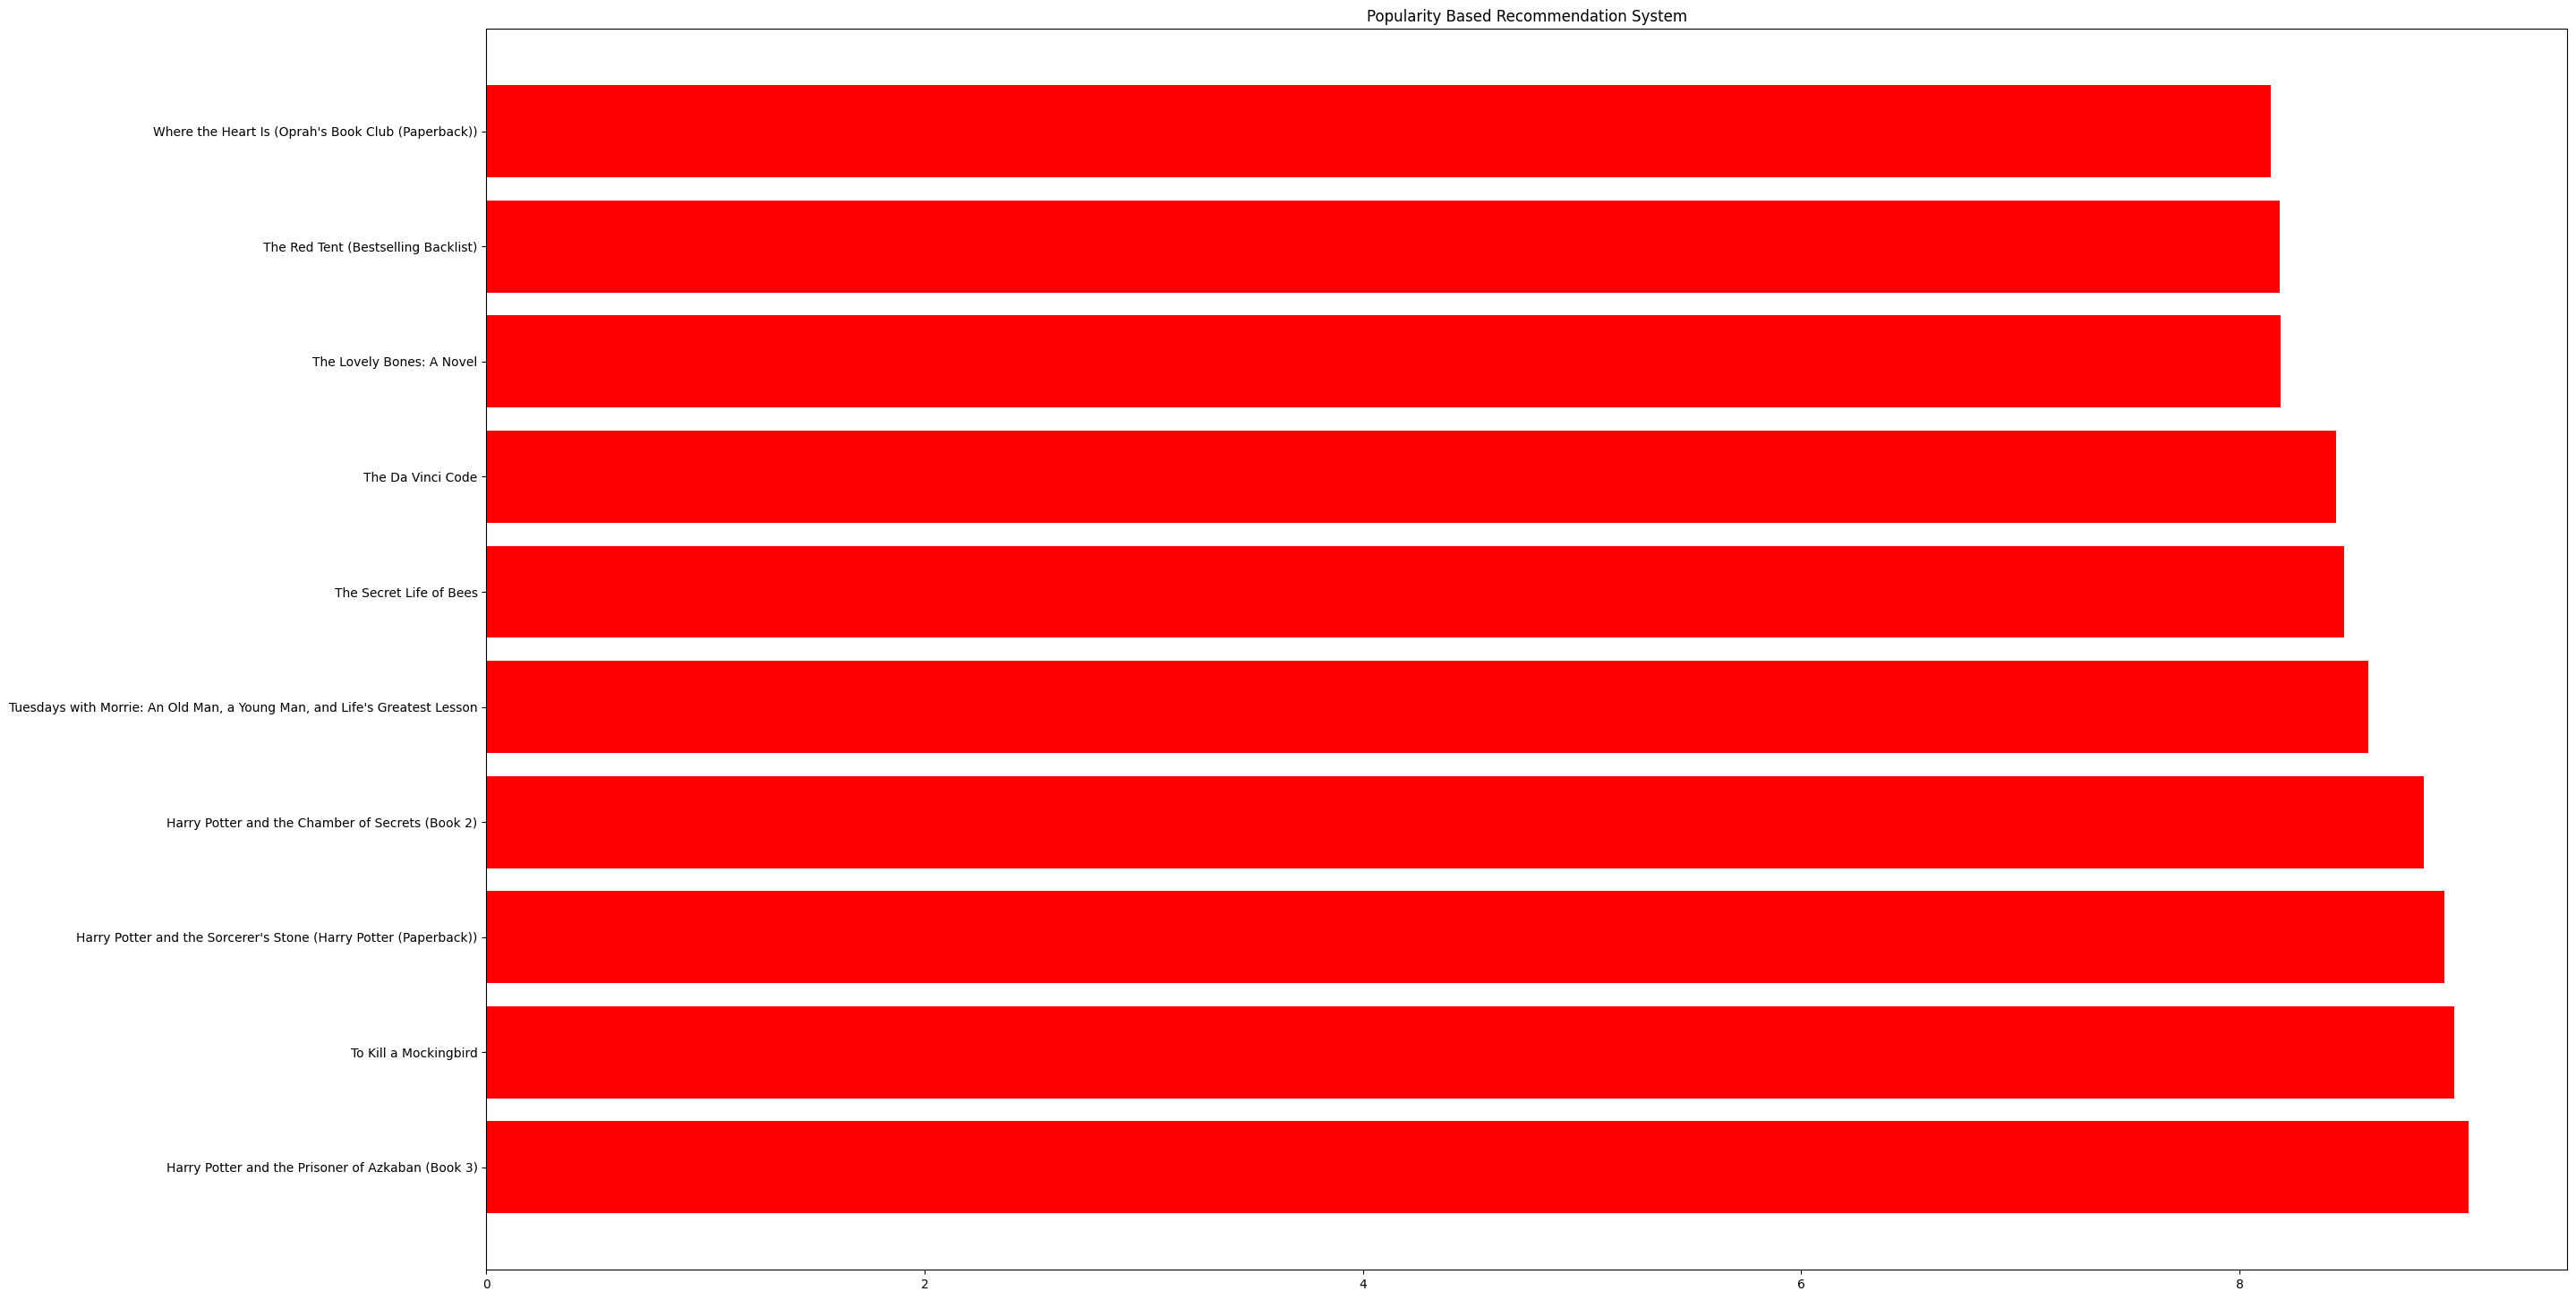

In [40]:
plt.figure(figsize=(30,18))
plt.barh(top_10_books['Book-Title'], top_10_books['avg_rating'], color ='red')
plt.title("Popularity Based Recommendation System")

In [41]:
top_10_books1 = top_10_books.merge(final_df1, on='Book-Title')
top_10_books1.head()

,Book-Title,num_rating,avg_rating,ISBN,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,User-ID,Book-Rating,Age,city,state,country
0,Harry Potter and the Prisoner of Azkaban (Book 3),277,9.043321,0439136350,J. K. Rowling,1999,Scholastic,http://images.amazon.com/images/P/0439136350.0...,http://images.amazon.com/images/P/0439136350.0...,http://images.amazon.com/images/P/0439136350.0...,254.0,9.0,24.0,minneapolis,minnesota,usa
1,Harry Potter and the Prisoner of Azkaban (Book 3),277,9.043321,0439136350,J. K. Rowling,1999,Scholastic,http://images.amazon.com/images/P/0439136350.0...,http://images.amazon.com/images/P/0439136350.0...,http://images.amazon.com/images/P/0439136350.0...,2033.0,9.0,27.0,omaha,nebraska,usa
2,Harry Potter and the Prisoner of Azkaban (Book 3),277,9.043321,0439136350,J. K. Rowling,1999,Scholastic,http://images.amazon.com/images/P/0439136350.0...,http://images.amazon.com/images/P/0439136350.0...,http://images.amazon.com/images/P/0439136350.0...,3300.0,10.0,49.0,cabot,arkansas,usa
3,Harry Potter and the Prisoner of Azkaban (Book 3),277,9.043321,0439136350,J. K. Rowling,1999,Scholastic,http://images.amazon.com/images/P/0439136350.0...,http://images.amazon.com/images/P/0439136350.0...,http://images.amazon.com/images/P/0439136350.0...,4802.0,7.0,28.0,london,england,united kingdom
4,Harry Potter and the Prisoner of Azkaban (Book 3),277,9.043321,0439136350,J. K. Rowling,1999,Scholastic,http://images.amazon.com/images/P/0439136350.0...,http://images.amazon.com/images/P/0439136350.0...,http://images.amazon.com/images/P/0439136350.0...,4809.0,9.0,35.0,grosse pointe,michigan,usa


In [42]:
final_df1.drop([ 'Image-URL-S', 'Image-URL-L','Image-URL-M'], axis = 1, inplace=True)
final_df1.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,User-ID,Book-Rating,Age,city,state,country
0,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,8.0,5.0,35.0,timmins,ontario,canada
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,11676.0,8.0,35.0,n/a,n/a,n/a
2,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,67544.0,8.0,30.0,toronto,ontario,canada
3,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,116866.0,9.0,35.0,ottawa,,
4,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,123629.0,9.0,35.0,kingston,ontario,canada


# Collaborative Book Recommendation System


In [43]:
x = final_df1.groupby('User-ID').count()['Book-Rating']>=25
exp_users = x[x].index

In [44]:
filtered_rating_users = final_df1[final_df1['User-ID'].isin(exp_users)]
filtered_rating_users

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,User-ID,Book-Rating,Age,city,state,country
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,11676.0,8.0,35.0,n/a,n/a,n/a
3,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,116866.0,9.0,35.0,ottawa,,
7,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,219008.0,7.0,60.0,halifax,nova scotia,canada
8,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,263325.0,6.0,27.0,fredericton,new brunswick,canada
11,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,35704.0,6.0,53.0,kansas city,missouri,usa
...,...,...,...,...,...,...,...,...,...,...,...
385014,1557100349,Benedict Arnold: Patriot and Traitor,Willard Sterne Randall,1990,Harpercollins,270737.0,9.0,63.0,stowe,vermont,usa
385028,0747204020,Illustrated Encyclopedia of Cacti,Glass Charles,1991,Headline,273718.0,10.0,32.0,london,england,united kingdom
385043,1845170423,Cocktail Classics,David Biggs,2004,Connaught,275970.0,7.0,46.0,pittsburgh,pennsylvania,usa
385045,0440400988,There's a Bat in Bunk Five,Paula Danziger,1988,Random House Childrens Pub (Mm),276463.0,7.0,26.0,providence,rhode island,usa


In [45]:
y = filtered_rating_users.groupby('Book-Title').count()['Book-Rating']>=25
famous_books = y[y].index

In [46]:
final_ratings = filtered_rating_users[filtered_rating_users['Book-Title'].isin(famous_books)]
final_ratings

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,User-ID,Book-Rating,Age,city,state,country
17,0399135782,The Kitchen God's Wife,Amy Tan,1991,Putnam Pub Group,11676.0,9.0,35.0,n/a,n/a,n/a
18,0399135782,The Kitchen God's Wife,Amy Tan,1991,Putnam Pub Group,29526.0,9.0,26.0,knoxville,tennessee,usa
19,0399135782,The Kitchen God's Wife,Amy Tan,1991,Putnam Pub Group,46398.0,9.0,37.0,san antonio,texas,usa
23,0399135782,The Kitchen God's Wife,Amy Tan,1991,Putnam Pub Group,148712.0,10.0,35.0,homer,alaska,usa
29,0399135782,The Kitchen God's Wife,Amy Tan,1991,Putnam Pub Group,230522.0,7.0,52.0,colorado springs,colorado,usa
...,...,...,...,...,...,...,...,...,...,...,...
382666,0330329537,One Hundred Years of Solitude,Gabriel Garcia-Marquez,1995,Pan Macmillan,229329.0,10.0,56.0,st-légier,vaud,switzerland
383244,0394579453,The Mummy or Ramses the Damned,Anne Rice,1989,Random House Trade,233911.0,1.0,41.0,romney,west virginia,usa
383903,0394429869,I Know Why the Caged Bird Sings,Maya Angelou,1996,Random House,239594.0,8.0,28.0,leuven,vlaams-brabant,belgium
384709,0553290703,Lightning,Patricia Potter,1992,Bantam Books,244685.0,9.0,35.0,rockvale,tennessee,


In [47]:
final_df = final_ratings.pivot_table(index='Book-Title',columns='User-ID',values='Book-Rating')
final_df.fillna(0,inplace=True)
final_df

User-ID,254.0,507.0,638.0,882.0,929.0,1025.0,1211.0,1424.0,1435.0,1733.0,...,277523.0,277639.0,277965.0,278026.0,278137.0,278188.0,278356.0,278418.0,278582.0,278633.0
Book-Title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2nd Chance,0.0,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
84 Charing Cross Road,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A Bend in the Road,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Word Freak: Heartbreak, Triumph, Genius, and Obsession in the World of Competitive Scrabble Players",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Wuthering Heights,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Year of Wonders,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [48]:
x = final_df1.groupby('User-ID').count()['Book-Rating']<25
less_exp_users = x[x].index

In [49]:
filtered_rating_less_exp_users = final_df1[final_df1['User-ID'].isin(less_exp_users)]
filtered_rating_less_exp_users

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,User-ID,Book-Rating,Age,city,state,country
0,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,8.0,5.0,35.0,timmins,ontario,canada
2,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,67544.0,8.0,30.0,toronto,ontario,canada
4,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,123629.0,9.0,35.0,kingston,ontario,canada
5,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,200273.0,8.0,35.0,comber,ontario,canada
6,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,210926.0,9.0,35.0,guelph,ontario,canada
...,...,...,...,...,...,...,...,...,...,...,...
385033,3525335423,Das Deutsche Kaiserreich 1871-1918.,Hans-Ulrich Wehler,1994,Vandenhoeck &amp; Ruprecht,274220.0,8.0,28.0,halle,sachsen-anhalt,germany
385034,3548740146,Wicca. Eine EinfÃ?Â¼hrung in weiÃ?Â?e Magie.,Scott Cunningham,2001,"Ullstein TB-Vlg., B.",274220.0,6.0,28.0,halle,sachsen-anhalt,germany
385035,381440176X,"Ein Fall fÃ?Â¼r TKKG, Bd.50, Sklaven fÃ?Â¼r Wu...",Stefan Wolf,1989,Pelikan,274220.0,8.0,28.0,halle,sachsen-anhalt,germany
385041,0395264707,Dreamsnake,Vonda N. McIntyre,1978,Houghton Mifflin,275318.0,10.0,49.0,klamath falls,oregon,usa


In [50]:
y = filtered_rating_less_exp_users.groupby('Book-Title').count()['Book-Rating']<25
rare_books = y[y].index

In [51]:
rare_books_ratings = filtered_rating_less_exp_users[filtered_rating_less_exp_users['Book-Title'].isin(rare_books)]
rare_books_ratings

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,User-ID,Book-Rating,Age,city,state,country
0,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,8.0,5.0,35.0,timmins,ontario,canada
2,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,67544.0,8.0,30.0,toronto,ontario,canada
4,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,123629.0,9.0,35.0,kingston,ontario,canada
5,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,200273.0,8.0,35.0,comber,ontario,canada
6,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,210926.0,9.0,35.0,guelph,ontario,canada
...,...,...,...,...,...,...,...,...,...,...,...
385033,3525335423,Das Deutsche Kaiserreich 1871-1918.,Hans-Ulrich Wehler,1994,Vandenhoeck &amp; Ruprecht,274220.0,8.0,28.0,halle,sachsen-anhalt,germany
385034,3548740146,Wicca. Eine EinfÃ?Â¼hrung in weiÃ?Â?e Magie.,Scott Cunningham,2001,"Ullstein TB-Vlg., B.",274220.0,6.0,28.0,halle,sachsen-anhalt,germany
385035,381440176X,"Ein Fall fÃ?Â¼r TKKG, Bd.50, Sklaven fÃ?Â¼r Wu...",Stefan Wolf,1989,Pelikan,274220.0,8.0,28.0,halle,sachsen-anhalt,germany
385041,0395264707,Dreamsnake,Vonda N. McIntyre,1978,Houghton Mifflin,275318.0,10.0,49.0,klamath falls,oregon,usa


In [52]:
from sklearn.metrics.pairwise import cosine_similarity

In [53]:
similarity_scores = cosine_similarity(final_df)
similarity_scores.shape

(597, 597)

In [62]:
book = input('Enter a book name: \n')
if book in rare_books_ratings['Book-Title'].values:
        recommend_books = top_10_books['Book-Title'].sample(n=5)
        print(f'\033[1m\n No Recommendations for this Book ☹️ \n\033[0m')
        print("You may try some popular books: \n\n")
        print(f'\033[1m{recommend_books}\033[0m')
else:
        book_index = np.where(final_df.index == book)[0][0]
        distances = similarity_scores[book_index]
        book_list = sorted(list(enumerate(distances)),reverse=True,key=lambda x:x[1])[1:6]
        
        print('\nYou may also like these : \n')
        for i in book_list:
            recommend_book = final_df.index[i[0]]
            print(f'\033[1m{recommend_book}\033[0m')


Enter a book name: 
1st to Die: A Novel

You may also like these : 

Pop Goes the Weasel
2nd Chance
Along Came a Spider (Alex Cross Novels)
Roses Are Red (Alex Cross Novels)
Kiss the Girls
